In [ ]:
"""
   Analyst : Jainam Shah

   Project : Flight_Delay 2022

   Purpose : Airline with most Delays

"""

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
df = pd.read_csv("/content/flight_data_2018_to_2022.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11,13,78,85,86,93) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [318]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Columns: 120 entries, Year to Unnamed: 119
dtypes: float64(72), int64(23), object(25)
memory usage: 516.1+ MB


In [320]:
df.isnull().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
                     ...  
Div5LongestGTime    563737
Div5WheelsOff       563737
Div5TailNum         563737
Duplicate                0
Unnamed: 119        563737
Length: 120, dtype: int64

In [321]:
df.drop(["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance"],axis = 1,inplace = True)

In [322]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563732,2022,1,1,24,1,2022-01-24,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563733,2022,1,1,24,1,2022-01-24,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563734,2022,1,1,24,1,2022-01-24,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
563735,2022,1,1,24,1,2022-01-24,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [323]:
df.drop(["Div1Airport","Div1AirportID","Div1AirportSeqID","Div1WheelsOn","Div1TotalGTime","Div1LongestGTime","Div1WheelsOff","Div1TailNum","Div2Airport","Div2AirportID","Div2AirportSeqID","Div2WheelsOn"],axis = 1,inplace = True)

In [324]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [325]:
df.drop(["Div2TotalGTime","Div2LongestGTime","Div2WheelsOff","Div2TailNum","Div3Airport","Div3AirportID","Div3AirportSeqID","Div3WheelsOn","Div3TotalGTime","Div3LongestGTime","Div3WheelsOff","Div3TailNum","Div4Airport","Div4AirportID","Div4AirportSeqID","Div4WheelsOn","Div4TotalGTime","Div4LongestGTime","Div4WheelsOff","Div4TailNum","Div5Airport","Div5AirportID","Div5AirportSeqID","Div5WheelsOn","Div5TotalGTime","Div5LongestGTime","Div5WheelsOff","Div5TailNum"],axis = 1,inplace = True)

In [326]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,A,0.0,173.0,NaN,NaN,1.0,1076.0,5,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,0.0,110.0,113.0,93.0,1.0,581.0,3,N,NaN
2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,0.0,116.0,106.0,83.0,1.0,581.0,3,N,NaN
3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,0.0,123.0,113.0,93.0,1.0,680.0,3,N,NaN
4,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,0.0,85.0,78.0,60.0,1.0,341.0,2,N,NaN


In [327]:
df.isnull().sum()

Year                  0
Quarter               0
Month                 0
DayofMonth            0
DayOfWeek             0
                  ...  
Flights               0
Distance              0
DistanceGroup         0
Duplicate             0
Unnamed: 119     563737
Length: 67, dtype: int64

In [328]:
df.drop(["Originally_Scheduled_Code_Share_Airline","DOT_ID_Originally_Scheduled_Code_Share_Airline","IATA_Code_Originally_Scheduled_Code_Share_Airline","Flight_Num_Originally_Scheduled_Code_Share_Airline"],axis = 1,inplace = True)

In [329]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline ',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups'

In [330]:
df.drop("Unnamed: 119",axis = 1,inplace = True)

In [331]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,Duplicate
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,1.0,A,0.0,173.0,NaN,NaN,1.0,1076.0,5,N
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,0.0,NaN,0.0,110.0,113.0,93.0,1.0,581.0,3,N
2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,0.0,NaN,0.0,116.0,106.0,83.0,1.0,581.0,3,N
3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,0.0,NaN,0.0,123.0,113.0,93.0,1.0,680.0,3,N
4,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,0.0,NaN,0.0,85.0,78.0,60.0,1.0,341.0,2,N


In [332]:
df.isnull().sum()

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
                 ...  
AirTime          36843
Flights              0
Distance             0
DistanceGroup        0
Duplicate            0
Length: 62, dtype: int64

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Data columns (total 62 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Year                                     563737 non-null  int64  
 1   Quarter                                  563737 non-null  int64  
 2   Month                                    563737 non-null  int64  
 3   DayofMonth                               563737 non-null  int64  
 4   DayOfWeek                                563737 non-null  int64  
 5   FlightDate                               563737 non-null  object 
 6   Marketing_Airline_Network                563737 non-null  object 
 7   Operated_or_Branded_Code_Share_Partners  563737 non-null  object 
 8   DOT_ID_Marketing_Airline                 563737 non-null  int64  
 9   IATA_Code_Marketing_Airline              563737 non-null  object 
 10  Flight_Number_Marketing_Airline 

In [334]:
df.drop("CancellationCode",axis = 1,inplace = True)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Year                                     563737 non-null  int64  
 1   Quarter                                  563737 non-null  int64  
 2   Month                                    563737 non-null  int64  
 3   DayofMonth                               563737 non-null  int64  
 4   DayOfWeek                                563737 non-null  int64  
 5   FlightDate                               563737 non-null  object 
 6   Marketing_Airline_Network                563737 non-null  object 
 7   Operated_or_Branded_Code_Share_Partners  563737 non-null  object 
 8   DOT_ID_Marketing_Airline                 563737 non-null  int64  
 9   IATA_Code_Marketing_Airline              563737 non-null  object 
 10  Flight_Number_Marketing_Airline 

In [336]:
#Will Make New DataSet for the columns which are actually required.

In [337]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline ',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups'

In [338]:
new_df = df.drop(["FlightDate","Marketing_Airline_Network","Operated_or_Branded_Code_Share_Partners","DOT_ID_Marketing_Airline","IATA_Code_Marketing_Airline","Flight_Number_Marketing_Airline","DOT_ID_Operating_Airline","IATA_Code_Operating_Airline","Flight_Number_Operating_Airline","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","OriginStateFips","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","DestStateFips","DestWac","CRSDepTime","DepDelayMinutes","DepDel15","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrDelayMinutes","ArrDel15","ArrTimeBlk","Cancelled","Diverted","CRSElapsedTime","ActualElapsedTime"],axis = 1,inplace = True)


In [339]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,OriginCityName,OriginState,...,DepDelay,DepartureDelayGroups,ArrTime,ArrDelay,ArrivalDelayGroups,AirTime,Flights,Distance,DistanceGroup,Duplicate
0,2022,1,1,6,4,DL,N315DN,FLL,"Fort Lauderdale, FL",FL,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1076.0,5,N
1,2022,1,1,6,4,DL,N545US,ATL,"Atlanta, GA",GA,...,-4.0,-1.0,1820.0,-1.0,-1.0,93.0,1.0,581.0,3,N
2,2022,1,1,6,4,DL,N545US,FLL,"Fort Lauderdale, FL",FL,...,-2.0,-1.0,2115.0,-12.0,-1.0,83.0,1.0,581.0,3,N
3,2022,1,1,6,4,DL,N345NB,FLL,"Fort Lauderdale, FL",FL,...,-5.0,-1.0,1212.0,-15.0,-1.0,93.0,1.0,680.0,3,N
4,2022,1,1,6,4,DL,N978AT,ATL,"Atlanta, GA",GA,...,-4.0,-1.0,1131.0,-11.0,-1.0,60.0,1.0,341.0,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563732,2022,1,1,24,1,YV,NaN,IAH,"Houston, TX",TX,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,395.0,2,N
563733,2022,1,1,24,1,YV,NaN,OKC,"Oklahoma City, OK",OK,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,395.0,2,N
563734,2022,1,1,24,1,YV,NaN,ATL,"Atlanta, GA",GA,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,534.0,3,N
563735,2022,1,1,24,1,YV,NaN,IAD,"Washington, DC",VA,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,534.0,3,N


In [340]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Operating_Airline ', 'Tail_Number', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'DepTime', 'DepDelay', 'DepartureDelayGroups',
       'ArrTime', 'ArrDelay', 'ArrivalDelayGroups', 'AirTime', 'Flights',
       'Distance', 'DistanceGroup', 'Duplicate'],
      dtype='object')

In [341]:
df.shape

(563737, 26)

In [342]:
exp_df = df.to_csv("Flight_2022.csv")

In [343]:
import os
os.getcwd()

'/content'

In [344]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,OriginCityName,OriginState,...,DepDelay,DepartureDelayGroups,ArrTime,ArrDelay,ArrivalDelayGroups,AirTime,Flights,Distance,DistanceGroup,Duplicate
0,2022,1,1,6,4,DL,N315DN,FLL,"Fort Lauderdale, FL",FL,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1076.0,5,N
1,2022,1,1,6,4,DL,N545US,ATL,"Atlanta, GA",GA,...,-4.0,-1.0,1820.0,-1.0,-1.0,93.0,1.0,581.0,3,N
2,2022,1,1,6,4,DL,N545US,FLL,"Fort Lauderdale, FL",FL,...,-2.0,-1.0,2115.0,-12.0,-1.0,83.0,1.0,581.0,3,N
3,2022,1,1,6,4,DL,N345NB,FLL,"Fort Lauderdale, FL",FL,...,-5.0,-1.0,1212.0,-15.0,-1.0,93.0,1.0,680.0,3,N
4,2022,1,1,6,4,DL,N978AT,ATL,"Atlanta, GA",GA,...,-4.0,-1.0,1131.0,-11.0,-1.0,60.0,1.0,341.0,2,N


In [345]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Operating_Airline ', 'Tail_Number', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState',
       'DestStateName', 'DepTime', 'DepDelay', 'DepartureDelayGroups',
       'ArrTime', 'ArrDelay', 'ArrivalDelayGroups', 'AirTime', 'Flights',
       'Distance', 'DistanceGroup', 'Duplicate'],
      dtype='object')

In [346]:
df.drop(["Year","Duplicate"],axis = 1,inplace = True)

In [347]:
df.drop(["Flights","OriginCityName","DestCityName","OriginState","DestState",],axis = 1,inplace = True)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Quarter               563737 non-null  int64  
 1   Month                 563737 non-null  int64  
 2   DayofMonth            563737 non-null  int64  
 3   DayOfWeek             563737 non-null  int64  
 4   Operating_Airline     563737 non-null  object 
 5   Tail_Number           553169 non-null  object 
 6   Origin                563737 non-null  object 
 7   OriginStateName       563737 non-null  object 
 8   Dest                  563737 non-null  object 
 9   DestStateName         563737 non-null  object 
 10  DepTime               528463 non-null  float64
 11  DepDelay              528452 non-null  float64
 12  DepartureDelayGroups  528452 non-null  float64
 13  ArrTime               527854 non-null  float64
 14  ArrDelay              526894 non-null  float64
 15  

In [349]:
df.isnull().sum()

Quarter                     0
Month                       0
DayofMonth                  0
DayOfWeek                   0
Operating_Airline           0
Tail_Number             10568
Origin                      0
OriginStateName             0
Dest                        0
DestStateName               0
DepTime                 35274
DepDelay                35285
DepartureDelayGroups    35285
ArrTime                 35883
ArrDelay                36843
ArrivalDelayGroups      36843
AirTime                 36843
Distance                    0
DistanceGroup               0
dtype: int64

## **EDA**

**Column** **Tail_Number**

In [350]:
df["Tail_Number"].replace(to_replace = np.nan,value = "Not_Known",inplace = True)

In [351]:
df[df.Tail_Number == "Not_Known"]

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,ArrTime,ArrDelay,ArrivalDelayGroups,AirTime,Distance,DistanceGroup
13394,1,1,30,7,DL,Not_Known,BOS,Massachusetts,LAX,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611.0,11
13422,1,1,30,7,DL,Not_Known,BOS,Massachusetts,SEA,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2496.0,10
13455,1,1,30,7,DL,Not_Known,BOS,Massachusetts,ATL,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.0,4
13551,1,1,30,7,DL,Not_Known,BOS,Massachusetts,ATL,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.0,4
13640,1,1,30,7,DL,Not_Known,BOS,Massachusetts,ATL,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563732,1,1,24,1,YV,Not_Known,IAH,Texas,OKC,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.0,2
563733,1,1,24,1,YV,Not_Known,OKC,Oklahoma,IAH,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.0,2
563734,1,1,24,1,YV,Not_Known,ATL,Georgia,IAD,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0,3
563735,1,1,24,1,YV,Not_Known,IAD,Virginia,ATL,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0,3


**COLUMN** **DepTime**

In [352]:
df["DepTime"].mean()

1333.1215146566553

In [353]:
df["DepTime"] = df["DepTime"].fillna(df["DepTime"].mean())

In [354]:
df["DepTime"].isnull().sum()

0

Column DepDelay (in minutes)

In [355]:
df["DepDelay"].mean()

11.098771506210593

In [356]:
df["DepDelay"] = df["DepDelay"].fillna(df["DepDelay"].mean())

In [357]:
df["DepDelay"].isnull().sum()

0

**COLUMN** **DepartureDelayGroups**

In [358]:
df["DepartureDelayGroups"].replace(to_replace = np.nan,value = -1,inplace = True)

In [359]:
df["DepartureDelayGroups"].isnull().sum()

0

**COLUMN** **ArrTime**

In [360]:
df["ArrTime"].mean()

1479.7574708157938

In [361]:
df["ArrTime"] = df["ArrTime"].fillna(df["ArrTime"].mean())

In [362]:
df["ArrTime"].isnull().sum()

0

**COLUMN** **ArrDelay**

In [363]:
df["ArrDelay"].mean()

4.221932684752531

In [364]:
df["ArrDelay"] = df["ArrDelay"].fillna(df["ArrDelay"].mean())

In [365]:
df["ArrDelay"].isnull().sum()

0

**COLUMN** **ArrivalDelayGroups**

In [366]:
df["ArrivalDelayGroups"].replace(to_replace = np.nan,value = -1,inplace = True)

In [367]:
df["ArrivalDelayGroups"].isnull().sum()

0

**COLUMN** **AirTime** 

In [368]:
df["AirTime"].mean()

112.25480836752743

In [369]:
df["AirTime"] = df["AirTime"].fillna(df["AirTime"].mean())

In [370]:
df["AirTime"].isnull().sum()

0

In [371]:
df.isnull().sum()

Quarter                 0
Month                   0
DayofMonth              0
DayOfWeek               0
Operating_Airline       0
Tail_Number             0
Origin                  0
OriginStateName         0
Dest                    0
DestStateName           0
DepTime                 0
DepDelay                0
DepartureDelayGroups    0
ArrTime                 0
ArrDelay                0
ArrivalDelayGroups      0
AirTime                 0
Distance                0
DistanceGroup           0
dtype: int64

**COLUMN** **DISTANCE**

In [372]:
df["Distance"].isnull().sum()

0

In [373]:
df["Distance"].median()

650.0

In [374]:
df["Distance"] = df["Distance"].fillna(df["Distance"].median())

In [375]:
df["Distance"].isnull().sum()

0

**COLUMN** **DistanceGroup**

In [376]:
df["DistanceGroup"].dtype

dtype('int64')

In [377]:
df["DistanceGroup"].replace(to_replace = np.nan,value = 4,inplace = True)

In [378]:
df["DistanceGroup"].isnull().sum()

0

# **Analysis**

In [379]:
df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline ',
       'Tail_Number', 'Origin', 'OriginStateName', 'Dest', 'DestStateName',
       'DepTime', 'DepDelay', 'DepartureDelayGroups', 'ArrTime', 'ArrDelay',
       'ArrivalDelayGroups', 'AirTime', 'Distance', 'DistanceGroup'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


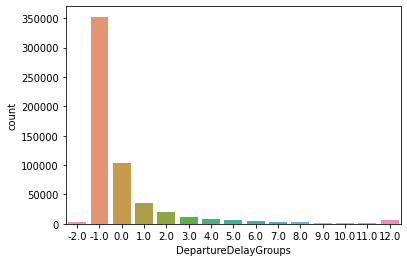

In [380]:
sns.countplot(df["DepartureDelayGroups"])

In [381]:
df["Operating_Airline "].value_counts()

WN    97436
AA    69400
DL    68963
OO    63129
UA    45741
YX    27262
MQ    22205
9E    21660
B6    21332
OH    20541
NK    17554
AS    16549
F9    12039
YV    11404
G4     8714
PT     8134
QX     8105
C5     6229
ZW     6035
HA     5868
G7     5437
Name: Operating_Airline , dtype: int64

In [382]:
 df["Operating_Airline "].unique()

array(['DL', '9E', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'QX', 'WN', 'YX',
       'AA', 'PT', 'AS', 'B6', 'OO', 'UA', 'C5', 'G7', 'ZW', 'YV'],
      dtype=object)

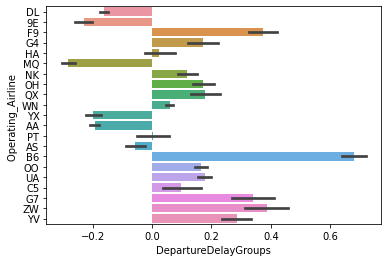

In [383]:
sns.barplot(x="DepartureDelayGroups",y='Operating_Airline ',data=df)
plt.show()

The Negative Delay Group shows that these airline have not been delayed,However 0-Positive groups shows how much these flight have been delayed in minutes in column "DepDelay" and have been grouped accordingly.

In [384]:
df.describe()

,Quarter,Month,DayofMonth,DayOfWeek,DepTime,DepDelay,DepartureDelayGroups,ArrTime,ArrDelay,ArrivalDelayGroups,AirTime,Distance,DistanceGroup
count,563737.0,563737.0,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000
mean,1.0,1.0,15.963577,4.044444,1333.121515,11.098772,0.031885,1479.757471,4.221933,-0.294925,112.254808,799.278985,3.669177
std,0.0,0.0,8.982503,2.086369,476.406257,49.056557,2.240740,505.540898,51.281607,2.384471,67.839244,587.348755,2.302481
min,1.0,1.0,1.000000,1.000000,1.000000,-55.000000,-2.000000,1.000000,-100.000000,-2.000000,8.000000,31.000000,1.000000
25%,1.0,1.0,8.000000,2.000000,946.000000,-6.000000,-1.000000,1124.000000,-17.000000,-2.000000,63.000000,369.000000,2.000000
50%,1.0,1.0,16.000000,4.000000,1333.121515,-2.000000,-1.000000,1479.757471,-6.000000,-1.000000,101.000000,650.000000,3.000000
75%,1.0,1.0,24.000000,6.000000,1719.000000,11.098772,0.000000,1857.000000,6.000000,0.000000,139.000000,1042.000000,5.000000
max,1.0,1.0,31.000000,7.000000,2400.000000,2512.000000,12.000000,2400.000000,2536.000000,12.000000,727.000000,5095.000000,11.000000


# Scalling

In [385]:
from sklearn.preprocessing import StandardScaler

In [386]:
std_scal = StandardScaler()

In [387]:
df[["ArrTime","ArrDelay","DepTime"]] = std_scal.fit_transform(df[["ArrTime","ArrDelay","DepTime"]])

In [388]:
df.head()

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,ArrTime,ArrDelay,ArrivalDelayGroups,AirTime,Distance,DistanceGroup
0,1,1,6,4,DL,N315DN,FLL,Florida,LGA,New York,4.772689e-16,11.098772,-1.0,4.497636e-16,0.000000,-1.0,112.254808,1076.0,5
1,1,1,6,4,DL,N545US,ATL,Georgia,FLL,Florida,6.168658e-01,-4.000000,-1.0,6.730273e-01,-0.101829,-1.0,93.000000,581.0,3
2,1,1,6,4,DL,N545US,FLL,Florida,ATL,Georgia,1.250779e+00,-2.000000,-1.0,1.256561e+00,-0.316331,-1.0,83.000000,581.0,3
3,1,1,6,4,DL,N345NB,FLL,Florida,RDU,North Carolina,-6.593570e-01,-5.000000,-1.0,-5.296460e-01,-0.374831,-1.0,93.000000,680.0,3
4,1,1,6,4,DL,N978AT,ATL,Georgia,JAN,Mississippi,-4.620462e-01,-4.000000,-1.0,-6.898706e-01,-0.296831,-1.0,60.000000,341.0,2


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Quarter               563737 non-null  int64  
 1   Month                 563737 non-null  int64  
 2   DayofMonth            563737 non-null  int64  
 3   DayOfWeek             563737 non-null  int64  
 4   Operating_Airline     563737 non-null  object 
 5   Tail_Number           563737 non-null  object 
 6   Origin                563737 non-null  object 
 7   OriginStateName       563737 non-null  object 
 8   Dest                  563737 non-null  object 
 9   DestStateName         563737 non-null  object 
 10  DepTime               563737 non-null  float64
 11  DepDelay              563737 non-null  float64
 12  DepartureDelayGroups  563737 non-null  float64
 13  ArrTime               563737 non-null  float64
 14  ArrDelay              563737 non-null  float64
 15  

In [390]:
df[["ArrTime","ArrDelay","DepTime"]] = df[["ArrTime","ArrDelay","DepTime"]].astype("int32")

In [391]:
df["ArrDelay"].unique()

array([ 0,  1,  2,  3,  4,  7,  9, 21, 11, 18,  5, -1, 17,  8, 22,  6, 12,
       14, 19, 10, 15, 20, 16, 13, 24, 23, 25, 26, 27, 28, 30, 29, 31, 40,
       49, 35, 32, 48, 34, -2, 33], dtype=int32)

In [392]:
df.describe()

,Quarter,Month,DayofMonth,DayOfWeek,DepTime,DepDelay,DepartureDelayGroups,ArrTime,ArrDelay,ArrivalDelayGroups,AirTime,Distance,DistanceGroup
count,563737.0,563737.0,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000,563737.000000
mean,1.0,1.0,15.963577,4.044444,-0.006743,11.098772,0.031885,-0.009316,0.141722,-0.294925,112.254808,799.278985,3.669177
std,0.0,0.0,8.982503,2.086369,0.672500,49.056557,2.240740,0.665313,0.831223,2.384471,67.839244,587.348755,2.302481
min,1.0,1.0,1.000000,1.000000,-2.000000,-55.000000,-2.000000,-2.000000,-2.000000,-2.000000,8.000000,31.000000,1.000000
25%,1.0,1.0,8.000000,2.000000,0.000000,-6.000000,-1.000000,0.000000,0.000000,-2.000000,63.000000,369.000000,2.000000
50%,1.0,1.0,16.000000,4.000000,0.000000,-2.000000,-1.000000,0.000000,0.000000,-1.000000,101.000000,650.000000,3.000000
75%,1.0,1.0,24.000000,6.000000,0.000000,11.098772,0.000000,0.000000,0.000000,0.000000,139.000000,1042.000000,5.000000
max,1.0,1.0,31.000000,7.000000,2.000000,2512.000000,12.000000,1.000000,49.000000,12.000000,727.000000,5095.000000,11.000000


In [393]:
df.head()

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,ArrTime,ArrDelay,ArrivalDelayGroups,AirTime,Distance,DistanceGroup
0,1,1,6,4,DL,N315DN,FLL,Florida,LGA,New York,0,11.098772,-1.0,0,0,-1.0,112.254808,1076.0,5
1,1,1,6,4,DL,N545US,ATL,Georgia,FLL,Florida,0,-4.000000,-1.0,0,0,-1.0,93.000000,581.0,3
2,1,1,6,4,DL,N545US,FLL,Florida,ATL,Georgia,1,-2.000000,-1.0,1,0,-1.0,83.000000,581.0,3
3,1,1,6,4,DL,N345NB,FLL,Florida,RDU,North Carolina,0,-5.000000,-1.0,0,0,-1.0,93.000000,680.0,3
4,1,1,6,4,DL,N978AT,ATL,Georgia,JAN,Mississippi,0,-4.000000,-1.0,0,0,-1.0,60.000000,341.0,2


# **ENCODING LabelEncoding & ONE-HOT**

In [394]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [395]:
df["Operating_Airline "].nunique()

21

In [396]:
en_df = pd.get_dummies(df,columns=["Operating_Airline "],prefix = ["OA"])
en_df

,Quarter,Month,DayofMonth,DayOfWeek,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,...,OA_NK,OA_OH,OA_OO,OA_PT,OA_QX,OA_UA,OA_WN,OA_YV,OA_YX,OA_ZW
0,1,1,6,4,N315DN,FLL,Florida,LGA,New York,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,6,4,N545US,ATL,Georgia,FLL,Florida,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,6,4,N545US,FLL,Florida,ATL,Georgia,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,6,4,N345NB,FLL,Florida,RDU,North Carolina,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,6,4,N978AT,ATL,Georgia,JAN,Mississippi,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563732,1,1,24,1,Not_Known,IAH,Texas,OKC,Oklahoma,0,...,0,0,0,0,0,0,0,1,0,0
563733,1,1,24,1,Not_Known,OKC,Oklahoma,IAH,Texas,0,...,0,0,0,0,0,0,0,1,0,0
563734,1,1,24,1,Not_Known,ATL,Georgia,IAD,Virginia,0,...,0,0,0,0,0,0,0,1,0,0
563735,1,1,24,1,Not_Known,IAD,Virginia,ATL,Georgia,0,...,0,0,0,0,0,0,0,1,0,0


In [397]:
df["Origin"].nunique()

369

In [398]:
ler = LabelEncoder()

In [399]:
en_df["Origin"]= ler.fit_transform(en_df["Origin"])

In [400]:
en_df.head()

,Quarter,Month,DayofMonth,DayOfWeek,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,...,OA_NK,OA_OH,OA_OO,OA_PT,OA_QX,OA_UA,OA_WN,OA_YV,OA_YX,OA_ZW
0,1,1,6,4,N315DN,127,Florida,LGA,New York,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,6,4,N545US,22,Georgia,FLL,Florida,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,6,4,N545US,127,Florida,ATL,Georgia,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,6,4,N345NB,127,Florida,RDU,North Carolina,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,6,4,N978AT,22,Georgia,JAN,Mississippi,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
df

,Quarter,Month,DayofMonth,DayOfWeek,Operating_Airline,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,DepDelay,DepartureDelayGroups,ArrTime,ArrDelay,ArrivalDelayGroups,AirTime,Distance,DistanceGroup
0,1,1,6,4,DL,N315DN,FLL,Florida,LGA,New York,0,11.098772,-1.0,0,0,-1.0,112.254808,1076.0,5
1,1,1,6,4,DL,N545US,ATL,Georgia,FLL,Florida,0,-4.000000,-1.0,0,0,-1.0,93.000000,581.0,3
2,1,1,6,4,DL,N545US,FLL,Florida,ATL,Georgia,1,-2.000000,-1.0,1,0,-1.0,83.000000,581.0,3
3,1,1,6,4,DL,N345NB,FLL,Florida,RDU,North Carolina,0,-5.000000,-1.0,0,0,-1.0,93.000000,680.0,3
4,1,1,6,4,DL,N978AT,ATL,Georgia,JAN,Mississippi,0,-4.000000,-1.0,0,0,-1.0,60.000000,341.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563732,1,1,24,1,YV,Not_Known,IAH,Texas,OKC,Oklahoma,0,11.098772,-1.0,0,0,-1.0,112.254808,395.0,2
563733,1,1,24,1,YV,Not_Known,OKC,Oklahoma,IAH,Texas,0,11.098772,-1.0,0,0,-1.0,112.254808,395.0,2
563734,1,1,24,1,YV,Not_Known,ATL,Georgia,IAD,Virginia,0,11.098772,-1.0,0,0,-1.0,112.254808,534.0,3
563735,1,1,24,1,YV,Not_Known,IAD,Virginia,ATL,Georgia,0,11.098772,-1.0,0,0,-1.0,112.254808,534.0,3


In [402]:
df["OriginStateName"].nunique()

53

In [403]:
en_df["OriginStateName"] = ler.fit_transform(en_df["OriginStateName"])
en_df.head()

,Quarter,Month,DayofMonth,DayOfWeek,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,...,OA_NK,OA_OH,OA_OO,OA_PT,OA_QX,OA_UA,OA_WN,OA_YV,OA_YX,OA_ZW
0,1,1,6,4,N315DN,127,8,LGA,New York,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,6,4,N545US,22,9,FLL,Florida,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,6,4,N545US,127,8,ATL,Georgia,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,6,4,N345NB,127,8,RDU,North Carolina,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,6,4,N978AT,22,9,JAN,Mississippi,0,...,0,0,0,0,0,0,0,0,0,0


In [404]:
df["Dest"].nunique()

369

In [405]:
en_df["Dest"] = ler.fit_transform(en_df["Dest"])

In [406]:
en_df.head()

,Quarter,Month,DayofMonth,DayOfWeek,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,...,OA_NK,OA_OH,OA_OO,OA_PT,OA_QX,OA_UA,OA_WN,OA_YV,OA_YX,OA_ZW
0,1,1,6,4,N315DN,127,8,201,New York,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,6,4,N545US,22,9,127,Florida,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,6,4,N545US,127,8,22,Georgia,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,6,4,N345NB,127,8,290,North Carolina,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,6,4,N978AT,22,9,179,Mississippi,0,...,0,0,0,0,0,0,0,0,0,0


In [407]:
df["DestStateName"].nunique()

53

In [408]:
en_df["DestStateName"] = ler.fit_transform(en_df["DestStateName"])
en_df.head()

,Quarter,Month,DayofMonth,DayOfWeek,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,...,OA_NK,OA_OH,OA_OO,OA_PT,OA_QX,OA_UA,OA_WN,OA_YV,OA_YX,OA_ZW
0,1,1,6,4,N315DN,127,8,201,31,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,6,4,N545US,22,9,127,8,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,6,4,N545US,127,8,22,9,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,6,4,N345NB,127,8,290,32,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,6,4,N978AT,22,9,179,23,0,...,0,0,0,0,0,0,0,0,0,0


In [409]:
en_df["Tail_Number"].nunique()

5583

In [410]:
en_df["Tail_Number"] = ler.fit_transform(en_df["Tail_Number"])
en_df.head()

,Quarter,Month,DayofMonth,DayOfWeek,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,...,OA_NK,OA_OH,OA_OO,OA_PT,OA_QX,OA_UA,OA_WN,OA_YV,OA_YX,OA_ZW
0,1,1,6,4,1308,127,8,201,31,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,6,4,2571,22,9,127,8,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,6,4,2571,127,8,22,9,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,6,4,1501,127,8,290,32,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,6,4,5487,22,9,179,23,0,...,0,0,0,0,0,0,0,0,0,0


In [411]:
en_df.shape

(563737, 39)

In [413]:
en_df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Tail_Number', 'Origin',
       'OriginStateName', 'Dest', 'DestStateName', 'DepTime', 'DepDelay',
       'DepartureDelayGroups', 'ArrTime', 'ArrDelay', 'ArrivalDelayGroups',
       'AirTime', 'Distance', 'DistanceGroup', 'OA_9E', 'OA_AA', 'OA_AS',
       'OA_B6', 'OA_C5', 'OA_DL', 'OA_F9', 'OA_G4', 'OA_G7', 'OA_HA', 'OA_MQ',
       'OA_NK', 'OA_OH', 'OA_OO', 'OA_PT', 'OA_QX', 'OA_UA', 'OA_WN', 'OA_YV',
       'OA_YX', 'OA_ZW'],
      dtype='object')

In [427]:
X = en_df.drop('DepDelay',axis=1)
Y = en_df.DepDelay

In [428]:
X.head()

,Quarter,Month,DayofMonth,DayOfWeek,Tail_Number,Origin,OriginStateName,Dest,DestStateName,DepTime,...,OA_NK,OA_OH,OA_OO,OA_PT,OA_QX,OA_UA,OA_WN,OA_YV,OA_YX,OA_ZW
0,1,1,6,4,1308,127,8,201,31,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,6,4,2571,22,9,127,8,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,6,4,2571,127,8,22,9,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,6,4,1501,127,8,290,32,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,6,4,5487,22,9,179,23,0,...,0,0,0,0,0,0,0,0,0,0


In [429]:
X.shape

(563737, 38)

In [430]:
Y.head()

0    11.098772
1    -4.000000
2    -2.000000
3    -5.000000
4    -4.000000
Name: DepDelay, dtype: float64

In [431]:
Y.shape

(563737,)

# **Train** **Test** **Split**

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [433]:
from sklearn.linear_model import LinearRegression

In [434]:
model_li = LinearRegression()
model_li.fit(X_train,Y_train)

LinearRegression()

In [435]:
model_li.score(X_train,Y_train)

0.9493190246230807

In [436]:
model_li.score(X_test,Y_test)

0.9542042532351129

**TRYING DIFFERENT TYPE OF MODELS**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR